In [3]:
#Data Preprocessing
import pandas as pd
import os

# File path
file_path = 'D:\\GUVI_Projects\\My_Projects\\Crimes_-_2001_to_Present.csv'

import pandas as pd

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Get a summary of the dataset
print(data.describe())


         ID Case Number                    Date                      Block  \
0   5741943    HN549294  08/25/2007 09:22:18 AM         074XX N ROGERS AVE   
1     25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2     26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3  13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4  13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   

   IUCR Primary Type                                        Description  \
0  0560      ASSAULT                                             SIMPLE   
1  0110     HOMICIDE                                FIRST DEGREE MURDER   
2  0110     HOMICIDE                                FIRST DEGREE MURDER   
3  0620     BURGLARY                                     UNLAWFUL ENTRY   
4  0454      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \

In [5]:
data.columns


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
#checking missing values
data.isnull()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8077147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8077148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8077149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

In [7]:
# Handling missing 'Location Description'
data['Location Description'].fillna('UNKNOWN', inplace=True)

# Dropping rows with missing 'District'
data.dropna(subset=['District'], inplace=True)

# Considering dropping 'Ward' and 'Community Area' due to high missing values
data.drop(columns=['Ward', 'Community Area'], inplace=True)

# Dropping rows with missing geographic data
data.dropna(subset=['Latitude', 'Longitude', 'X Coordinate', 'Y Coordinate', 'Location'], inplace=True)

# Verify the changes
print(data.isnull().sum())

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [8]:
#Descriptive Statistics
# Descriptive statistics for numerical features
print(data.describe())

# Frequency counts for categorical data
print(data['Primary Type'].value_counts())

                 ID          Beat      District          Ward  Community Area  \
count  8.077151e+06  8.077151e+06  8.077104e+06  7.462305e+06    7.463681e+06   
mean   7.251138e+06  1.184977e+03  1.129740e+01  2.276916e+01    3.743256e+01   
std    3.630950e+06  7.035118e+02  6.958819e+00  1.385516e+01    2.154604e+01   
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00   
25%    3.903034e+06  6.210000e+02  6.000000e+00  1.000000e+01    2.300000e+01   
50%    7.247163e+06  1.034000e+03  1.000000e+01  2.300000e+01    3.200000e+01   
75%    1.050030e+07  1.731000e+03  1.700000e+01  3.400000e+01    5.700000e+01   
max    1.348547e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

       X Coordinate  Y Coordinate          Year      Latitude     Longitude  
count  7.988193e+06  7.988193e+06  8.077151e+06  7.988193e+06  7.988193e+06  
mean   1.164621e+06  1.885846e+06  2.010428e+03  4.184236e+01 -8.767142e+01  
std    1.698233e+04  3.247292e+04  6

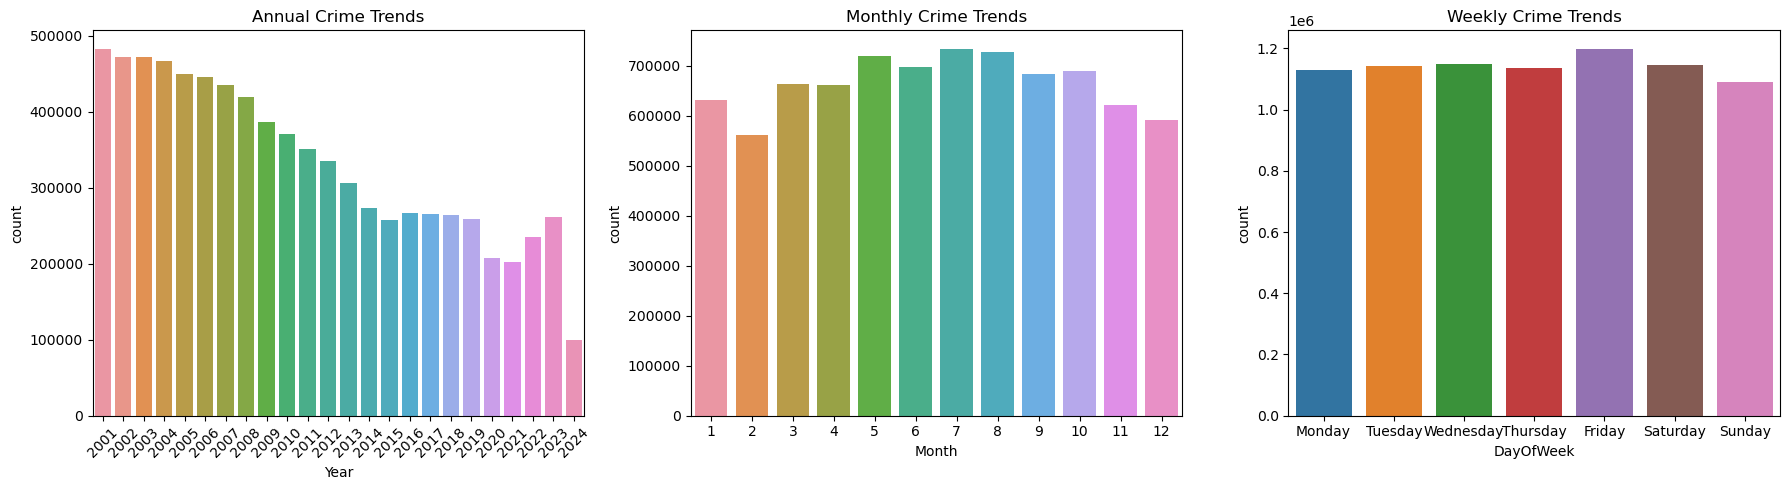

Overall arrest rate: 25.68%


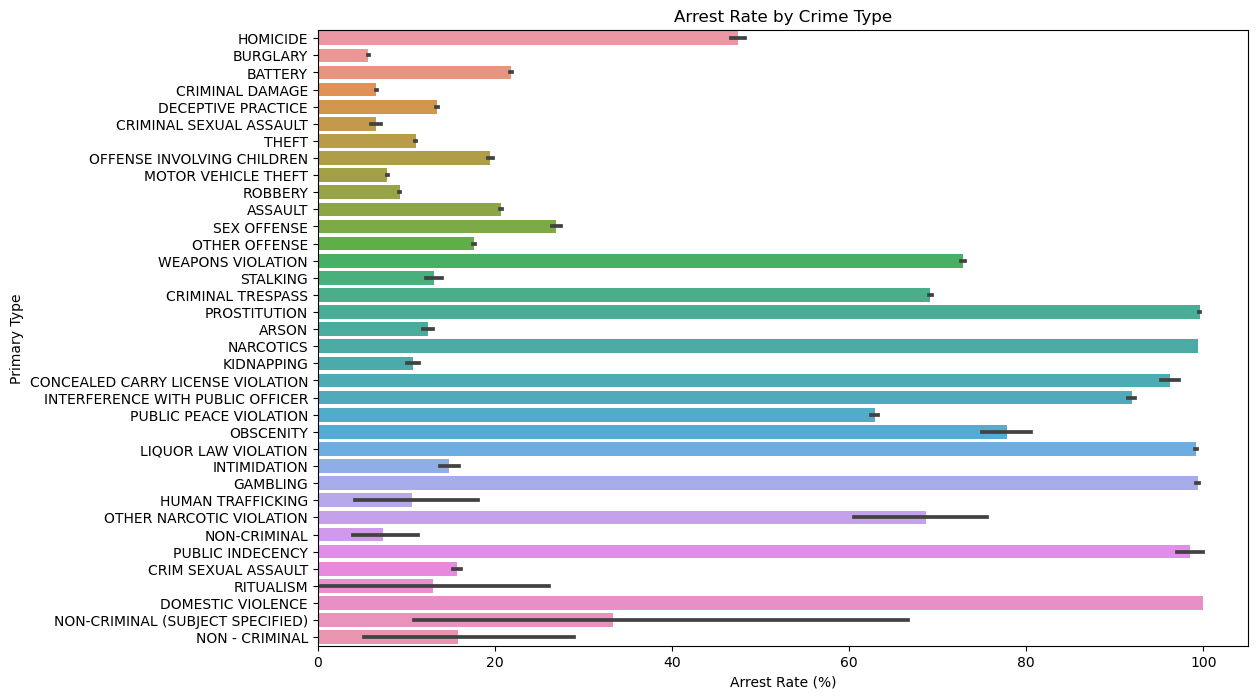

Domestic incident rates: False    82.753633
True     17.246367%
                              Location   Primary Type  Counts
614375   (41.754592961, -87.741528537)          THEFT    7644
1832407  (41.883500187, -87.627876698)          THEFT    7536
2811766  (41.976290414, -87.905227221)          THEFT    5273
2008694  (41.897895128, -87.624096605)          THEFT    3917
2166940  (41.909664252, -87.742728815)          THEFT    2866
2811761  (41.976290414, -87.905227221)  OTHER OFFENSE    2577
1646137  (41.868180939, -87.709271389)      NARCOTICS    2471
1817320  (41.882394062, -87.627844798)          THEFT    2288
1648540  (41.868541914, -87.639235361)          THEFT    2183
1816297   (41.88233367, -87.627841791)          THEFT    2115
Data analysis and visualization complete. Cleaned data saved for dashboard implementation.


In [16]:
#Exploratory Data Analysis (EDA)
#Temporal Analysis-Examine how crime has changed over time to identify trends or patterns.
#Annual Trends-Visualize the total number of crimes per year to see if there is a rising or falling trend.
# Visualizations:
# Annual Trends: A bar chart showing the total number of crimes per year.
# Monthly Trends: A bar chart displaying the frequency of crimes by month.
# Weekly Trends: A bar chart showing the distribution of crimes by day of the week.
# Crime Type Distribution: A bar chart showing the frequency of different types of crimes.
# Geospatial Analysis: A heatmap is created using folium to visualize crime hotspots based on latitude and longitude.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)  # Drop rows where 'Date' could not be converted

# Extract additional temporal data
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.day_name()

# Visualize Crime Trends by Year, Month, and Day of the Week
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Year', data=data, ax=ax[0])
ax[0].set_title('Annual Crime Trends')
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(x='Month', data=data, ax=ax[1])
ax[1].set_title('Monthly Crime Trends')

sns.countplot(x='DayOfWeek', data=data, ax=ax[2], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[2].set_title('Weekly Crime Trends')
plt.tight_layout()
plt.show()

# Arrest Rate Analysis
data['Arrest'] = data['Arrest'].astype(bool)
print(f"Overall arrest rate: {data['Arrest'].mean() * 100:.2f}%")

# Arrest rates by crime type
plt.figure(figsize=(12, 8))
sns.barplot(x='Arrest', y='Primary Type', data=data, estimator=lambda x: sum(x)/len(x) * 100)
plt.title('Arrest Rate by Crime Type')
plt.xlabel('Arrest Rate (%)')
plt.show()

# Domestic Incident Analysis
domestic_counts = data['Domestic'].value_counts(normalize=True) * 100
print(f"Domestic incident rates: {domestic_counts.to_string()}%")

# Heatmap of Crime Locations
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=11)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)
map.save('Chicago_Crime_Heatmap.html')

# Recidivism Rates and Repeat Crime Locations Analysis
repeat_locations = data.groupby(['Location', 'Primary Type']).size().reset_index(name='Counts')
repeat_locations = repeat_locations[repeat_locations['Counts'] > 1]
top_repeat_locations = repeat_locations.sort_values(by='Counts', ascending=False).head(10)
print(top_repeat_locations)

# Save the cleaned and processed dataset for dashboard use
data.to_csv('Cleaned_Chicago_Crime_Data.csv', index=False)

print("Data analysis and visualization complete. Cleaned data saved for dashboard implementation.")


In [ ]:
pip install pandas matplotlib seaborn folium



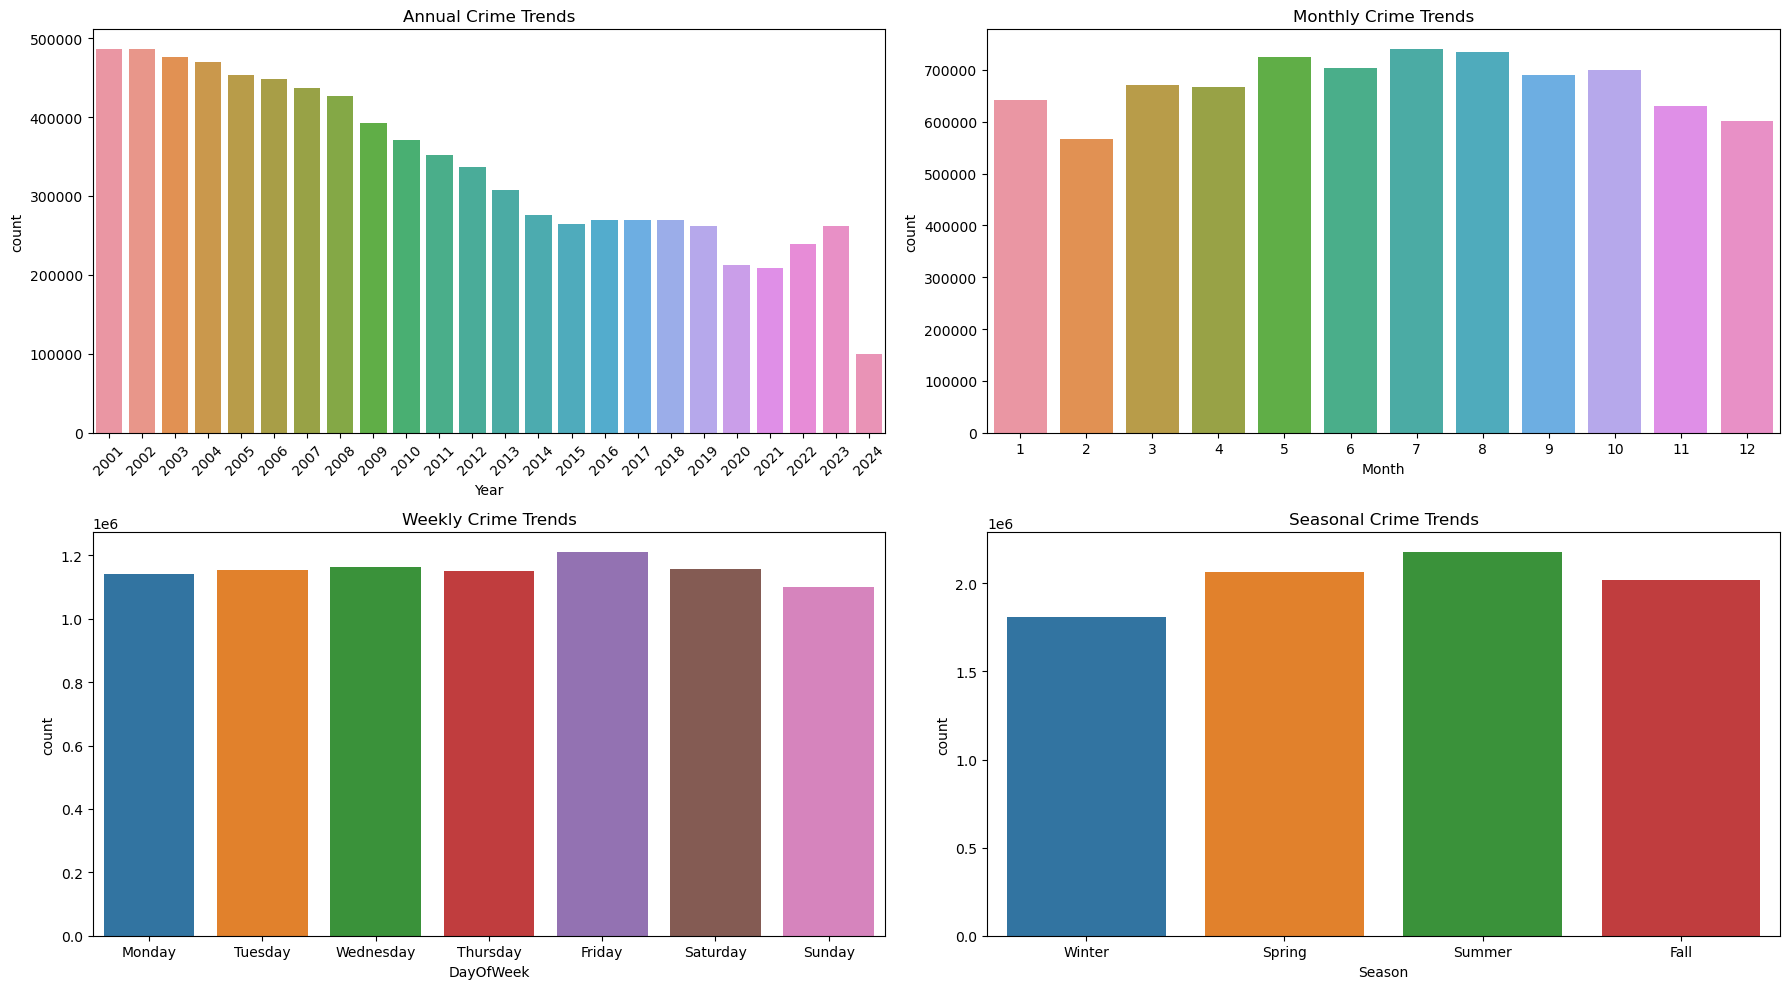

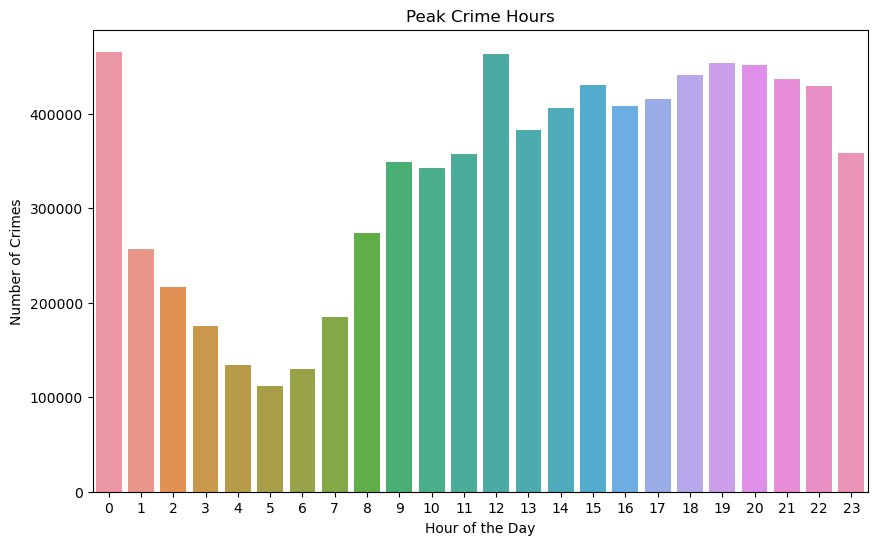

Overall arrest rate: 25.65%


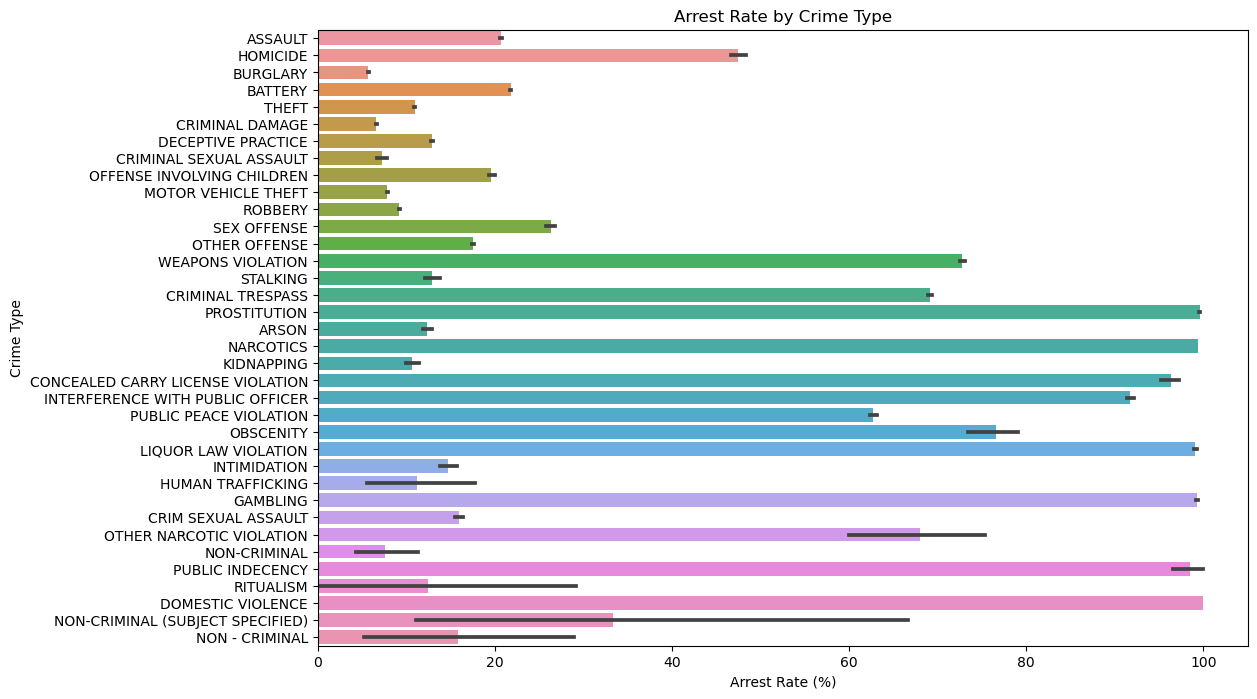

Domestic incident rates: False    82.798229
True     17.201771%


ValueError: Location values cannot contain NaNs.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap



# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)  # Drop rows where 'Date' could not be converted

# Extract additional temporal data
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Hour'] = data['Date'].dt.hour

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

data['Season'] = data['Month'].apply(get_season)

# Visualize Crime Trends by Year, Month, Day of the Week, and Season
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(x='Year', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Annual Crime Trends')
ax[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='Month', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Monthly Crime Trends')

sns.countplot(x='DayOfWeek', data=data, ax=ax[1, 0], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[1, 0].set_title('Weekly Crime Trends')

sns.countplot(x='Season', data=data, ax=ax[1, 1], order=['Winter', 'Spring', 'Summer', 'Fall'])
ax[1, 1].set_title('Seasonal Crime Trends')

plt.tight_layout()
plt.show()

# Peak Crime Hours
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data)
plt.title('Peak Crime Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.show()

# Arrest Rate Analysis
data['Arrest'] = data['Arrest'].astype(bool)
print(f"Overall arrest rate: {data['Arrest'].mean() * 100:.2f}%")

# Arrest rates by crime type
plt.figure(figsize=(12, 8))
sns.barplot(y='Primary Type', x='Arrest', data=data, estimator=lambda x: sum(x)/len(x) * 100, orient='h')
plt.title('Arrest Rate by Crime Type')
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Crime Type')
plt.show()

# Domestic Incident Analysis
domestic_counts = data['Domestic'].value_counts(normalize=True) * 100
print(f"Domestic incident rates: {domestic_counts.to_string()}%")

# Crime Hotspots Heatmap
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=11)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)
map.save('Chicago_Crime_Heatmap.html')

# Crime by District/Ward
district_crime_counts = data['District'].value_counts()
plt.figure(figsize=(14, 8))
sns.barplot(x=district_crime_counts.index, y=district_crime_counts.values, palette='viridis')
plt.title('Crime Count by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

# Distribution of Crime Types
crime_type_counts = data['Primary Type'].value_counts()
plt.figure(figsize=(14, 8))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette='viridis')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

# Severity Analysis
severe_crimes = ['HOMICIDE', 'ASSAULT', 'ROBBERY', 'BATTERY', 'BURGLARY']
severe_data = data[data['Primary Type'].isin(severe_crimes)]
plt.figure(figsize=(12, 8))
sns.countplot(y='Primary Type', data=severe_data, order=severe_data['Primary Type'].value_counts().index, palette='Reds')
plt.title('Distribution of Severe Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

# Repeat Crime Location
repeat_locations = data.groupby(['Location Description']).size().reset_index(name='Counts')
repeat_locations = repeat_locations[repeat_locations['Counts'] > 1]
top_repeat_locations = repeat_locations.sort_values(by='Counts', ascending=False).head(10)
print("Top 10 Repeat Crime Locations:")
print(top_repeat_locations)

# Save the cleaned and processed dataset for dashboard use
data.to_csv('Cleaned_Chicago_Crime_Data.csv', index=False)

print("Data analysis and visualization complete. Cleaned data saved for dashboard implementation.")
